<a href="https://colab.research.google.com/github/RakeshSharma21/Sessions_Notebook/blob/main/Model_Section_11_Jan_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
url = "telco_churn.csv"
df = pd.read_csv(url)

# Preview dataset
print(df.head())

   Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female         False    True      False       1   
1           1  5575-GNVDE    Male         False   False      False      34   
2           2  3668-QPYBK    Male         False   False      False       2   
3           3  7795-CFOCW    Male         False   False      False      45   
4           4  9237-HQITU  Female         False   False      False       2   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0        False           NaN             DSL  ...            False   
1         True         False             DSL  ...             True   
2         True         False             DSL  ...            False   
3        False           NaN             DSL  ...             True   
4         True         False     Fiber optic  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False       

In [112]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [113]:
df.dtypes

,0
Unnamed: 0,int64
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [114]:
# convert Flase to No and True to Yes in Churn column in dataframe
df['Churn'] = df['Churn'].replace({'False': 'No', 'True': 'Yes'})

In [115]:
df['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
5038,No
5039,No
5040,No
5041,Yes


## identify the data quality issues

In [119]:
# check for the missing values
df.isnull().sum()

,0
Unnamed: 0,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,269
InternetService,0


In [117]:
# check for the duplicate values
df.duplicated().sum()

0

In [118]:
# dropping the empty values from the churn column
df.dropna(subset=['Churn'], inplace=True)

In [120]:
# summary of numerical columns
df.describe()

,Unnamed: 0,tenure,MonthlyCharges
count,5042.000000,5042.000000,5042.000000
mean,1305.318326,32.568822,65.081376
std,801.213537,24.525954,30.064564
min,0.000000,0.000000,18.400000
25%,630.000000,9.000000,35.762500
50%,1260.000000,29.000000,70.550003
75%,1890.000000,56.000000,90.050002
max,2999.000000,72.000000,118.650002


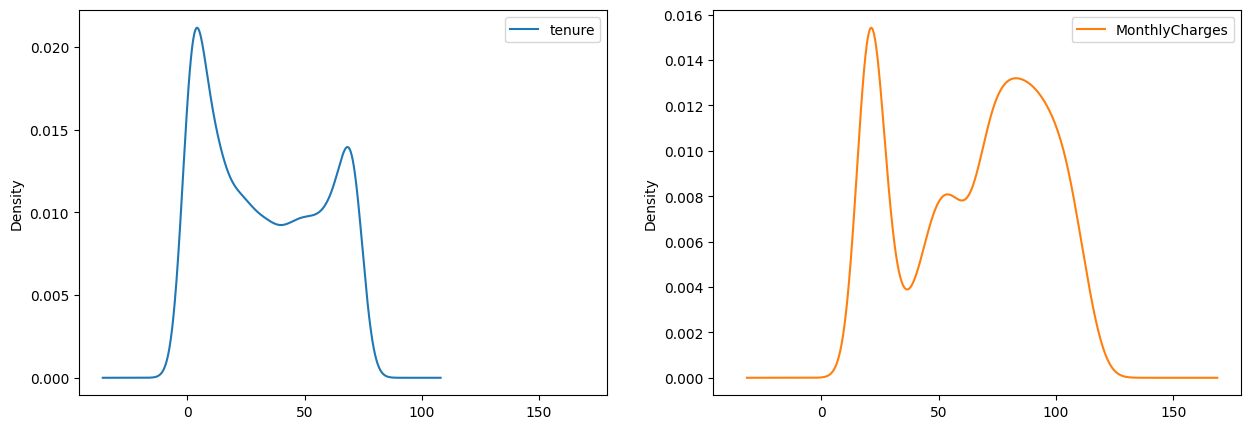

In [121]:
# plot the kde chart for tenure and MonthlyCharges
df[['tenure', 'MonthlyCharges']].plot(kind='kde', subplots=True, layout=(1,2), figsize=(15,5))
plt.show()

1.   if mean > median then + ve or right side skew.
2.   if mean < median then -ve or left side skew.

1.   if max -75% > 25%-min then +ve or right side skew
2.   if max -75% < 25%-min then -ve or left side skew

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5042 non-null   int64  
 1   customerID        5042 non-null   object 
 2   gender            5042 non-null   object 
 3   SeniorCitizen     5042 non-null   object 
 4   Partner           5042 non-null   object 
 5   Dependents        5042 non-null   object 
 6   tenure            5042 non-null   int64  
 7   PhoneService      5042 non-null   object 
 8   MultipleLines     4773 non-null   object 
 9   InternetService   5042 non-null   object 
 10  OnlineSecurity    4391 non-null   object 
 11  OnlineBackup      4391 non-null   object 
 12  DeviceProtection  4391 non-null   object 
 13  TechSupport       4391 non-null   object 
 14  StreamingTV       4391 non-null   object 
 15  StreamingMovies   4391 non-null   object 
 16  Contract          5042 non-null   object 
 17  

In [123]:
df.dtypes

,0
Unnamed: 0,int64
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [124]:
#convert the categorical columns
categorical_cols = ['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod', 'Churn']

In [125]:
df[categorical_cols]=df[categorical_cols].apply(LabelEncoder().fit_transform)

In [126]:
df.dtypes

,0
Unnamed: 0,int64
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64


In [127]:
#convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [128]:
df.dtypes

,0
Unnamed: 0,int64
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64


In [129]:
df.isnull().sum()

,0
Unnamed: 0,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [130]:
# replacing missing values in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-130-f44b6c044b21>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [131]:
# normalise the numerical values using standard scalar
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [132]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
5038,0
5039,0
5040,0
5041,1


In [133]:
# define feature X and target y column
X = df.drop(columns=['customerID','Churn','Unnamed: 0'], axis=1)
y = df['Churn']

In [134]:
y.value_counts()

,count
Churn,
0,3706
1,1336


In [135]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,2,2,0,-1.287287,0,5,0,0,3,0,0,0,0,0,2,2,-1.171973,-1.001356
1,1,2,0,0,0.058359,2,0,0,3,0,3,0,0,0,1,0,3,-0.270491,-0.180899
2,1,2,0,0,-1.246510,2,0,0,3,3,0,0,0,0,0,2,3,-0.373612,-0.966811
3,1,2,0,0,0.506908,0,5,0,3,0,3,3,0,0,1,0,0,-0.757824,-0.202407
4,0,2,0,0,-1.246510,2,0,1,0,0,0,0,0,0,0,2,2,0.186904,-0.947619


In [136]:
# split data to train and test
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
print("Class Distribution in Training Set:\n", y_train.value_counts(normalize=True))


Class Distribution in Training Set:
 Churn
0    0.730722
1    0.269278
Name: proportion, dtype: float64


In [138]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate model
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Confusion Matrix:
 [[666  93]
 [ 98 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       759
           1       0.62      0.61      0.61       250

    accuracy                           0.81      1009
   macro avg       0.75      0.74      0.74      1009
weighted avg       0.81      0.81      0.81      1009



In [139]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate model
y_pred_knn = knn.predict(X_test)
print("\nk-NN Classification Report:\n", classification_report(y_test, y_pred_knn))



k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       759
           1       0.49      0.52      0.51       250

    accuracy                           0.75      1009
   macro avg       0.66      0.67      0.67      1009
weighted avg       0.75      0.75      0.75      1009



In [140]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Evaluate model
y_pred_tree = dtree.predict(X_test)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       759
           1       0.63      0.57      0.60       250

    accuracy                           0.81      1009
   macro avg       0.75      0.73      0.74      1009
weighted avg       0.80      0.81      0.81      1009



In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(3, 15),lr[2,3,4]}
param_grid = {'max_depth': range(3, 15),lr= (2,4)}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 15)})

In [142]:
grid_search.best_params_

{'max_depth': 4}

In [143]:
grid_search.best_score_

0.7832898244578302

In [144]:
y_pred_dt=grid_search.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       759
           1       0.65      0.53      0.58       250

    accuracy                           0.81      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.80      0.81      0.81      1009

0.8136769078295342
[[689  70]
 [118 132]]
